In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import LabelBinarizer

C:\Users\xiaob\anaconda3\envs\project_726\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\xiaob\anaconda3\envs\project_726\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\xiaob\anaconda3\envs\project_726\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\xiaob\anaconda3\envs\project_726\lib\site-pack

In [11]:
import os
p = os.path.abspath(os.getcwd())
p1, _ = os.path.split(p)
datapath, _ = os.path.split(p1)
print(p)
print(p1)
print(datapath)

I:\cmpt-726-project\code\model
I:\cmpt-726-project\code
I:\cmpt-726-project


In [14]:
train_image = pd.read_csv(datapath + '\data\data2\\train.csv')
test_image = pd.read_csv(datapath + '\data\data2\\test.csv')

train_labels = np.array(train_image['label'].values)
train_images = np.array(train_image.drop('label',axis=1).values)

test_labels = np.array(test_image['label'].values)
test_images = np.array(test_image.drop('label',axis=1).values)

In [15]:
train_images = train_images / 255.0
train_images = train_images.reshape(train_images.shape[0], 60, 60, 1)

In [16]:
test_images = test_images / 255.0
test_images = test_images.reshape(test_images.shape[0], 60, 60, 1)

In [17]:
lb = LabelBinarizer()
train_labels = lb.fit_transform(train_labels)
test_labels = lb.fit_transform(test_labels)

In [24]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense

In [26]:
# Build and train neural network
model = Sequential([
    Conv2D(64, (8,8), padding='same', activation='relu', input_shape=(60,60,1)),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(10, activation='relu'),
    Dense(24, activation='softmax')
])

# Compile neural network
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy']
             )

# Train the neural network
model.fit(train_images, train_labels, epochs=10, validation_data = (test_images,test_labels))

Train on 2845 samples, validate on 569 samples
Epoch 1/10
2845/2845 [==============================] - 5s 2ms/sample - loss: 2.6710 - acc: 0.1441 - val_loss: 2.3639 - val_acc: 0.1880
Epoch 2/10
2845/2845 [==============================] - 5s 2ms/sample - loss: 2.0681 - acc: 0.2953 - val_loss: 1.8849 - val_acc: 0.3585
Epoch 3/10
2845/2845 [==============================] - 5s 2ms/sample - loss: 1.5718 - acc: 0.5047 - val_loss: 1.3951 - val_acc: 0.5800
Epoch 4/10
2845/2845 [==============================] - 5s 2ms/sample - loss: 1.2819 - acc: 0.6116 - val_loss: 1.1583 - val_acc: 0.6309
Epoch 5/10
2845/2845 [==============================] - 5s 2ms/sample - loss: 1.0964 - acc: 0.6668 - val_loss: 0.9923 - val_acc: 0.6907
Epoch 6/10
2845/2845 [==============================] - 5s 2ms/sample - loss: 0.9624 - acc: 0.6896 - val_loss: 0.9093 - val_acc: 0.7206
Epoch 7/10
2845/2845 [==============================] - 5s 2ms/sample - loss: 0.8766 - acc: 0.7293 - val_loss: 0.7830 - val_acc: 0.7452
E

In [27]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

print('Model 1: Test loss: {}, Test accuracy: {}'.format(test_loss, (test_accuracy)*100))

569/569 [==============================] - 0s 491us/sample - loss: 0.5096 - acc: 0.8647
Model 1: Test loss: 0.5095922550962344, Test accuracy: 86.46748661994934


In [28]:
print(model.history.history)

{'loss': [2.6710032691016976, 2.0680921681526465, 1.5717589143709474, 1.2819188989528663, 1.096436982247029, 0.9624408620522604, 0.8766189987504419, 0.7521043276116383, 0.6483274120438078, 0.5641486023871886], 'acc': [0.14411248, 0.29525483, 0.5047452, 0.6115993, 0.6667838, 0.6896309, 0.72934973, 0.7602812, 0.7957821, 0.8333919], 'val_loss': [2.3638617208846213, 1.8848681273904542, 1.3950652011878042, 1.1583397350747053, 0.9922633989205051, 0.9093329001394852, 0.7829648070888485, 0.6741061514416982, 0.6016488147012379, 0.5095922609624209], 'val_acc': [0.18804921, 0.35852373, 0.5799649, 0.63093144, 0.6906854, 0.7205624, 0.74516696, 0.7961336, 0.84182775, 0.86467487]}


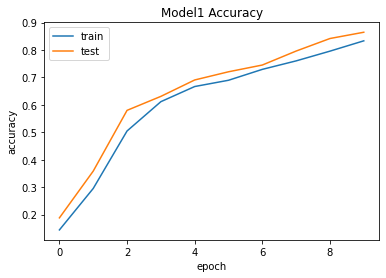

In [29]:
#model 1 test result
plt.plot(model.history.history['acc'])
plt.plot(model.history.history['val_acc'])
plt.title("Model1 Accuracy")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'])

plt.show()

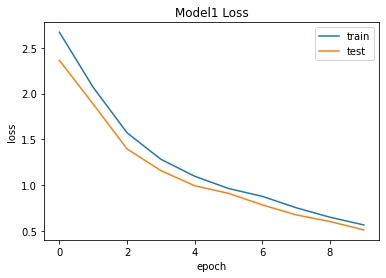

In [30]:
#model 1 test result
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title("Model1 Loss")
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','test'])

plt.show()